In [2]:
import pandas as pd
import json

In [4]:
b_strs = open("./yelp_dataset/yelp_academic_dataset_business.json", encoding='utf-8').readlines()
b_data = []
for s in b_strs:
    b_data.append(json.loads(s))
df = pd.DataFrame.from_records(b_data)

In [88]:
df_edit = df[(df['is_open']==1)&((df['state']=='CO')|(df['state']=='OR')|(df['state']=='FL')|(df['state']=='GA')|(df['state']=='BC')|(df['state']=='OH')|(df['state']=='TX')|(df['state']=='MA')|(df['state']=='WA'))].dropna(subset=['categories','state','stars'])

In [5]:
df_edit.to_json(path_or_buf='business.json',orient='records')

In [49]:
import matplotlib.pyplot as plt

In [50]:
df['a'] = df['categories'].str.find('Pizza')

In [51]:
df['is_r'] = df['categories'].str.find('Restaurants')

In [9]:
import numpy as np
np.mean(df['review_count'])

51.96454837002211

Text(0, 0.5, '# of Ratings')

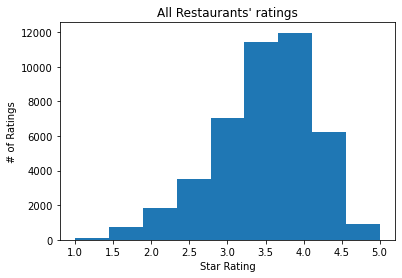

In [92]:
plt.hist(df[(df['review_count']>=10)&(df['is_r']!=-1)]['stars'],9)
plt.title('All Restaurants\' ratings')
plt.xlabel('Star Rating')
plt.ylabel('# of Ratings')

Text(0, 0.5, '# of Ratings')

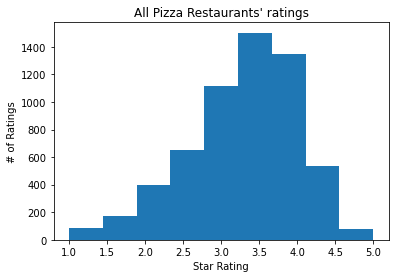

In [93]:
plt.hist(df[df['a']!=-1]['stars'], 9)
plt.title('All Pizza Restaurants\' ratings')
plt.xlabel('Star Rating')
plt.ylabel('# of Ratings')

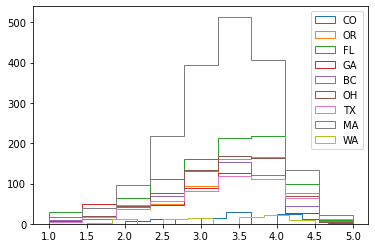

In [53]:
st = ['CO','OR','FL','GA','BC','OH','TX','MA','WA']
for s in st:
    plt.hist(df[(df['state']==s)&(df['a']!=-1)]['stars'], 9, label=s, histtype='step')
plt.legend()

Text(0, 0.5, 'Star Rating')

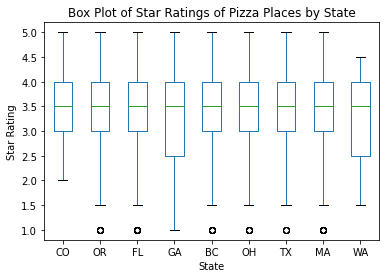

In [109]:
d = {s:df[(df['state']==s)&(df['a']!=-1)]['stars'] for s in st}
df_st = pd.DataFrame(d)
ax = df_st.plot.box(title='Box Plot of Star Ratings of Pizza Places by State')
ax.set_xlabel('State')
ax.set_ylabel('Star Rating')

Text(0, 0.5, 'Star Rating')

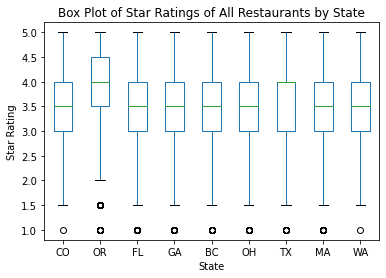

In [108]:
d = {s:df[(df['state']==s)&(df['is_r']!=-1)]['stars'] for s in st}
df_r = pd.DataFrame(d)
ax = df_r.plot.box(title='Box Plot of Star Ratings of All Restaurants by State')
ax.set_xlabel('State')
ax.set_ylabel('Star Rating')

In [29]:
sum_rc = df[df['is_r']!=-1]['review_count'].sum()
w_ave = 0
for _, row in df[df['is_r']!=-1].iterrows():
    w_ave += (row['review_count']/sum_rc) * row['stars']
w_ave

3.74981189721401

In [30]:
n_ave = df[df['is_r']!=-1]['stars'].sum()/len(df[df['is_r']!=-1]['stars'])
n_ave

3.523064978969299

In [31]:
st_ave = [[s,0,0] for i,s in enumerate(st)]
for i,s in enumerate(st):
    st_sum = df[(df['state']==s)&(df['is_r']!=-1)]['review_count'].sum()
    for _, row in df[(df['state']==s)&(df['is_r']!=-1)].iterrows():
        st_ave[i][1] += (row['review_count']/st_sum) * row['stars']
    st_ave[i][2] = df[(df['state']==s)&(df['is_r']!=-1)]['stars'].sum()/len(df[(df['state']==s)&(df['is_r']!=-1)]['stars'])
print(st_ave)

[['CO', 3.798662176711797, 3.575635103926097], ['OR', 3.885356339524819, 3.748617666891436], ['FL', 3.7989360810584025, 3.516910716599715], ['GA', 3.695017167577682, 3.3933506746870425], ['BC', 3.6384549052663897, 3.4509320905459386], ['OH', 3.717800379891451, 3.4197080291970803], ['TX', 3.8228414692127193, 3.6507776761207684], ['MA', 3.6611787291110516, 3.47402965341392], ['WA', 3.6539361970098883, 3.45671834625323]]


[<AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in CO'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in OR'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in FL'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in GA'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in BC'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in OH'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in TX'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot of Star Ratings of Cuisines in MA'}, xlabel='Cuisines', ylabel='Star Ratings'>,
 <AxesSubplot:title={'center':'Box Plot 

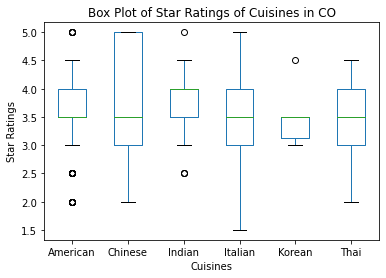

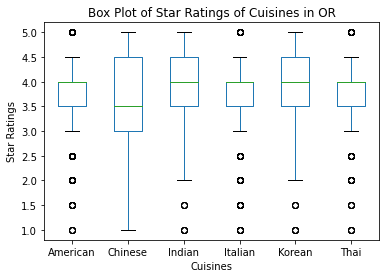

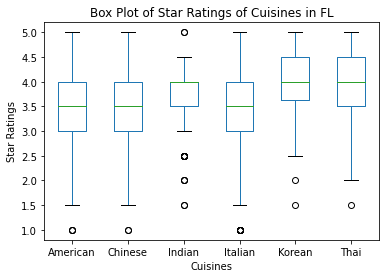

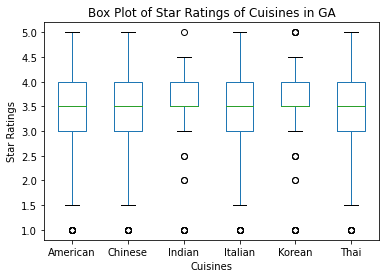

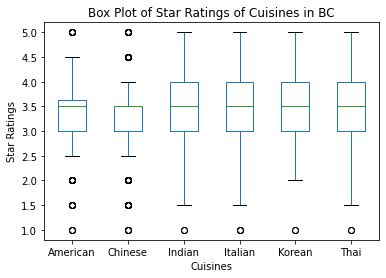

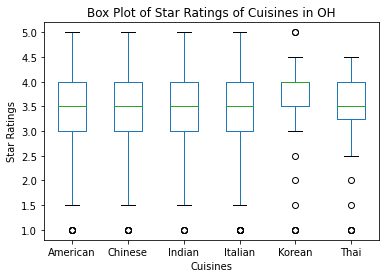

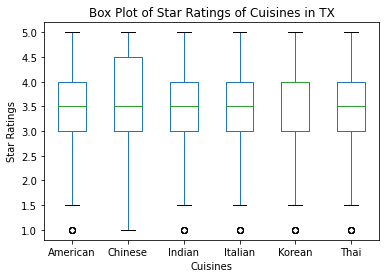

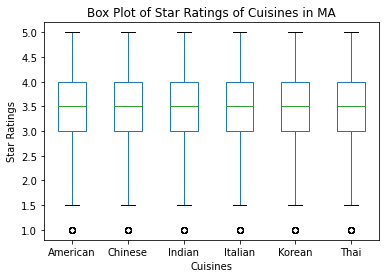

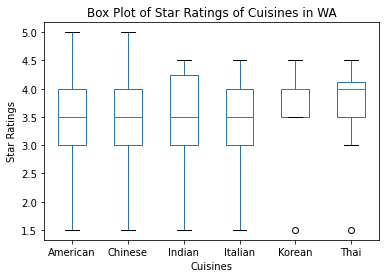

In [54]:
cuis = ['American','Chinese','Indian','Italian','Korean','Thai']
graphs = []
for c in cuis:
    df[c] = df['categories'].str.find(c)
for i in range(len(st)):
    d = {c:df[(df['state']==st[i])&(df[c]!=-1)]['stars'] for c in cuis}
    df_hold = pd.DataFrame(d)
    ax = df_hold.plot.box(title='Box Plot of Star Ratings of Cuisines in '+st[i])
    ax.set_xlabel('Cuisines')
    ax.set_ylabel('Star Ratings')
    graphs.append(ax)
graphs

In [55]:
import scipy.stats as sp

In [56]:
chi = df[df['a']!=-1]
asdf = []

for s in st:
    asdf.append([len(chi[(chi['state']==s)&(chi['stars']>=3)]), len(chi[(chi['state']==s)&(chi['stars']<3)])])
    
print('chi squared value of Pizza by State: '+str(sp.chi2_contingency(asdf)[1]))

chi squared value of Pizza by State: 1.9445978629129493e-05


In [57]:
# cuis = ['American','Chinese','Indian','Italian','Korean','Thai']
print('chi squared value of Cuisines by State:')
for c in cuis:
    chi = df[df[c]!=-1]
    asdf = []

    for s in st:
        asdf.append([len(chi[(chi['state']==s)&(chi['stars']>=3)]), len(chi[(chi['state']==s)&(chi['stars']<3)])])

    print(c, sp.chi2_contingency(asdf)[1])

chi squared value of Cuisines by State:
American 3.6119843159562343e-10
Chinese 0.00019225206249091963
Indian 0.11312734396604016
Italian 2.5254041324440352e-05
Korean 0.00011007721057856074
Thai 0.00029134148234971304


In [6]:
from apyori import apriori
import re

In [117]:
cats = df[(df['is_r']!=-1)&(df['Indian']!=-1)]['categories'].dropna()
l = [re.findall('[a-zA-z]+', s) for s in cats]

rules = list(apriori(l, min_support = 0.1, min_confidence = .7, min_lift = 1, min_length = 1))
print('Assocation Rule applied on Indian Restaurants')
print([rules[i][2] for i in range(len(rules))])

Assocation Rule applied on Indian Restaurants
[[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Indian'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Restaurants'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Food'}), items_add=frozenset({'Indian'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Food'}), items_add=frozenset({'Restaurants'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Halal'}), items_add=frozenset({'Indian'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Halal'}), items_add=frozenset({'Restaurants'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset({'Pakistani'}), items_add=frozenset({'Indian'}), confidence=1.0, lift=1.0)], [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Indian', 'Restaurants'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'Indian'}), it